## This notebook assumes you have the following packages installed in your conda environment.

In [95]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [96]:
df_default = pd.read_csv('scripts-data/run_1/default-nd.csv')
df_default.shape


(2728, 171)

In [97]:
df_sign = pd.read_csv('scripts-data/run_1/signdata.csv')
df_sign.shape

(2728, 176)

In [98]:
df_sign['SignBankEnglishTranslations'].value_counts()

especially, except, special, unique                  3
cry out, shout, scream, yell                         3
canine, dog, puppy                                   3
clip, cut, scissors, snip, trim                      3
do not mind, don't care, not care                    2
                                                    ..
towel, dry off                                       1
dizzy, faint, light-headed, vertigo                  1
clock, half (an) hour, hour, thirty minutes, time    1
bi-, double, twice                                   1
cologne, perfume, scent                              1
Name: SignBankEnglishTranslations, Length: 1696, dtype: int64

In [99]:
df_default["Code"].values

array(['J_01_098', 'H_02_048', 'H_03_086', ..., 'E_03_042', 'B_02_056',
       'D_01_057'], dtype=object)

## Community Analysis

In [100]:
edges_df = pd.read_csv('scripts-data/run_1/default-neighbors.csv')
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [101]:
edges_df.shape

(13250, 6)

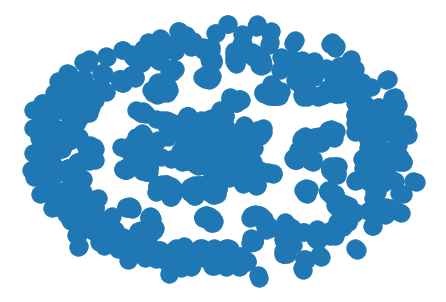

In [102]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [103]:
#first compute the best partition
from networkx.algorithms.community import greedy_modularity_communities
G = g

#Two methods for community analysis
c = greedy_modularity_communities(G)
partition = community.best_partition(G)

In [104]:
len(c)

274

In [105]:
num_nodes = 0
for community in c:
    num_nodes += len(community)
print(num_nodes)

1920


In [106]:
len(partition)

1920

In [107]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

1920


,Code,group_id
0,B_01_062,0
1,A_01_002,0
2,C_03_023,0
3,F_02_088,0
4,H_03_004,0


In [108]:
# get edges only where source and target nodes belong to a valid community for now. This is to assign them group ids.
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

1920
(13250, 6)
(13250, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [109]:

df_merged = pd.merge(df_default, df_with_groupids,how='left', on=['Code'])
print(df_merged.shape)
# print(df_merged.columns.values)
df_merged.head()

(2728, 172)


,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,H index,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,group_id
0,arms-cross,arms-cross,J_01_098,NaN,3.467,2.177,-0.458,30,0,3.400,...,NaN,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0,NaN
1,raise-hand,raise-hand,H_02_048,NaN,5.154,1.891,0.544,28,0,5.500,...,NaN,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0,NaN
2,sigh,sigh,H_03_086,NaN,3.931,1.751,-0.196,30,0,3.267,...,NaN,sigh\t,0,3,0,3,NaN,sigh\t,0,NaN
3,1_dollar,1_dollar,C_02_025,NaN,3.034,1.500,-0.775,29,0,2.944,...,NaN,DOLLAR,9,0,9,0,NaN,DOLLAR,0,NaN
4,5_dollars,5_dollars,B_01_062,NaN,5.120,1.716,0.302,25,0,5.214,...,-0.2,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5,0.0


In [110]:

#Will assign all NaN's same color for now. That's okay.

df_merged.head()
unique_community_ids = df_merged['group_id'].unique()
color_dict = []
for groupid in unique_community_ids:
    #generate a random color
    color = randomcolor.RandomColor().generate()[0]
    color_dict.append({'group_id': groupid, 'color_code': color})
    
color_dict

[{'group_id': nan, 'color_code': '#a7c13f'},
 {'group_id': 0.0, 'color_code': '#ef5dd9'},
 {'group_id': 130.0, 'color_code': '#71dda5'},
 {'group_id': 168.0, 'color_code': '#cc4f02'},
 {'group_id': 117.0, 'color_code': '#67edfc'},
 {'group_id': 240.0, 'color_code': '#3ac627'},
 {'group_id': 128.0, 'color_code': '#d887db'},
 {'group_id': 52.0, 'color_code': '#c11175'},
 {'group_id': 198.0, 'color_code': '#d82960'},
 {'group_id': 125.0, 'color_code': '#b5dd5f'},
 {'group_id': 166.0, 'color_code': '#1bdae8'},
 {'group_id': 41.0, 'color_code': '#7af271'},
 {'group_id': 87.0, 'color_code': '#8c9b09'},
 {'group_id': 167.0, 'color_code': '#e6ffb2'},
 {'group_id': 60.0, 'color_code': '#91f2ab'},
 {'group_id': 2.0, 'color_code': '#d3cb34'},
 {'group_id': 12.0, 'color_code': '#e6f29d'},
 {'group_id': 176.0, 'color_code': '#fcaeb3'},
 {'group_id': 254.0, 'color_code': '#ff498f'},
 {'group_id': 103.0, 'color_code': '#ea00c3'},
 {'group_id': 86.0, 'color_code': '#f22e8c'},
 {'group_id': 127.0, 'col

In [111]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head()


(2728, 173)


,EntryID,LemmaID,Code,YouTube Video,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),...,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,group_id,color_code
0,arms-cross,arms-cross,J_01_098,NaN,3.467,2.177,-0.458,30,0,3.400,...,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0,NaN,#a7c13f
1,raise-hand,raise-hand,H_02_048,NaN,5.154,1.891,0.544,28,0,5.500,...,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0,NaN,#a7c13f
2,sigh,sigh,H_03_086,NaN,3.931,1.751,-0.196,30,0,3.267,...,sigh\t,0,3,0,3,NaN,sigh\t,0,NaN,#a7c13f
3,1_dollar,1_dollar,C_02_025,NaN,3.034,1.500,-0.775,29,0,2.944,...,DOLLAR,9,0,9,0,NaN,DOLLAR,0,NaN,#a7c13f
4,5_dollars,5_dollars,B_01_062,NaN,5.120,1.716,0.302,25,0,5.214,...,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5,0.0,#ef5dd9


In [112]:
df_merged_with_color.shape

(2728, 173)

In [113]:
#Need only 3 columsn for now
df_node_graph_json_data = df_merged_with_color[["EntryID", "Code", "group_id", "color_code", "SignFrequency(Z)"]]
print(df_node_graph_json_data.shape)
df_node_graph_json_data.head(20)


(2728, 5)


,EntryID,Code,group_id,color_code,SignFrequency(Z)
0,arms-cross,J_01_098,NaN,#a7c13f,-0.458
1,raise-hand,H_02_048,NaN,#a7c13f,0.544
2,sigh,H_03_086,NaN,#a7c13f,-0.196
3,1_dollar,C_02_025,NaN,#a7c13f,-0.775
4,5_dollars,B_01_062,0.0,#ef5dd9,0.302
5,8_hour,C_02_055,NaN,#a7c13f,-0.043
6,9_oclock,C_02_080,130.0,#71dda5,-0.126
7,a-line_bob,K_03_127,168.0,#cc4f02,-0.198
8,a_little_bit,H_03_025,117.0,#67edfc,-0.762
9,abbreviate,G_01_040,240.0,#3ac627,0.669


In [114]:
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN
1,A_01_002,C_03_023,12,"SelectedFingers.2.0, FlexionChange.2.0, Spread...",1,Flexion.2.0
2,A_01_002,F_02_088,12,"Flexion.2.0, FlexionChange.2.0, Spread.2.0, Sp...",1,SelectedFingers.2.0
3,A_01_002,H_03_004,12,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",1,ThumbPosition.2.0
4,A_01_002,J_03_046,13,"SelectedFingers.2.0, Flexion.2.0, FlexionChang...",0,NaN


In [115]:
not_need_edge_cols = ['num_matched_features', 'matched_features', 'num_missed_features', 'missed_features']
links_df = edges_df.drop(columns=not_need_edge_cols)
links_df.head()

,target,source
0,A_01_002,B_01_062
1,A_01_002,C_03_023
2,A_01_002,F_02_088
3,A_01_002,H_03_004
4,A_01_002,J_03_046


In [116]:
edges_json_str = links_df.to_json(orient="records")
edges_json = json.loads(edges_json_str)
edges_json[0]

{'target': 'A_01_002', 'source': 'B_01_062'}

In [117]:
#### Get rid of morpheme columbs
print(len(df_default.columns.values))
df_sign = df_sign[['YouTube Video','Code','SignBankEnglishTranslations']]
df_sign = df_sign.rename(columns={"YouTube Video": "video"}, errors="raise")
df_sign.head()
df_default = pd.merge(df_default, df_sign,how='left', on=['Code'])

test_df = df_default
filtered = test_df.filter(regex='M..2.0|Video')
no_morphemes_df = test_df[test_df.columns.drop(filtered.columns.values)]
len(no_morphemes_df.columns.values)


171


87

In [118]:
### Add sign constraint range values
numerical_attr = no_morphemes_df.select_dtypes(include=['float', 'int']).columns.values
categorical_attr = []
for column in no_morphemes_df.columns.values:
    if column not in numerical_attr:
        categorical_attr.append(column)   
# print(numerical_attr)
# print(categorical_attr)

In [119]:
import math 
import pprint

constraints = {}
for attr in categorical_attr:
    if attr not in ['EntryID', 'LemmaID', 'Code', 'Iconicity_ID']:
        columnsData = no_morphemes_df.loc[ : , attr ].dropna()
        values_set = set(columnsData.values)
        constraints[attr] = [*values_set, ]
        
for attr in numerical_attr:    
    #drop nan values 
    columnsData = no_morphemes_df.loc[ : , attr ].dropna()
    constraints[attr] = {}  
    #print(math.floor(min(list(columnsData))), math.ceil(max(list(columnsData))), attr)
    constraints[attr]['min'] = math.floor(min(columnsData.values))
    constraints[attr]['max'] = math.ceil(max(columnsData.values))

pprint.pprint(constraints)

{'ClipLength(ms)': {'max': 3737, 'min': 701},
 'Compound.2.0': {'max': 1, 'min': 0},
 'Contact.2.0': {'max': 1, 'min': 0},
 'Contact.2.0Frequency': {'max': 1694, 'min': 1030},
 'D.Iconicity(M) all': {'max': 7, 'min': 1},
 'D.Iconicity(M) native': {'max': 7, 'min': 1},
 'D.Iconicity(N) all': {'max': 31, 'min': 26},
 'D.Iconicity(N) native': {'max': 22, 'min': 18},
 'D.Iconicity(SD) all': {'max': 3, 'min': 0},
 'D.Iconicity(SD) native': {'max': 3, 'min': 0},
 'D.Iconicity(Z) all': {'max': 3, 'min': -2},
 'D.Iconicity(Z) native': {'max': 3, 'min': -2},
 'DominantTranslation': ['hinge',
                         'channel',
                         'appointment',
                         'sunbathe_2',
                         'smell_money',
                         'spread_3',
                         'dunk_head',
                         'feed',
                         'first',
                         'mention',
                         'glow',
                         'atlanta',
        

                                 'stunned, surprised, thunderstruck',
                                 'cook, food, kitchen, pancake',
                                 'sell, shop, shopping, store',
                                 'hammer, nail, tool',
                                 'clear out, discard, hold, ignore, push '
                                 'aside, push away, put aside, reject, set '
                                 'aside, throw away',
                                 'computer, keyboard, type, typing, typist, '
                                 'typewriter, type out',
                                 'key, lock, turn, twist',
                                 'needle, sew, sewing, stitch, stitches',
                                 'daunted, overwhelm, overwhelmed',
                                 'climb the stairs, staircase, stairs',
                                 'animal, penguin, waddle',
                                 'air, blow, wind, windy',
             

                  'WEEK',
                  'WORRY',
                  'STUPID',
                  'BUTTER',
                  'SCROLL-DOWN\t',
                  'PLEASE',
                  'ROOMMATE',
                  'SKATEBOARDING',
                  'NEVER',
                  'KICK',
                  'SCOOP',
                  'IMPRESSION',
                  'SCOUT',
                  'CORN5',
                  'RED',
                  'LIFT',
                  'ONE',
                  'PRINT',
                  'YOUNG',
                  'CHAMPION',
                  'PROCESS',
                  'CHANCE',
                  'EXPENSIVE',
                  'TEA',
                  'CAPTURE',
                  'HOSPITAL-HEAD\t',
                  'SECRET',
                  'TODAY',
                  'EARx',
                  'NEXT-YEAR',
                  'CHANGEx',
                  'BAKE-2        ?',
                  'CONTACT',
                  'VLOG',
                  'VIDEOP

           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/FJa3lyGPBmI?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/67V25KZuyAU?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/AJxMMlm-c7c?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/j_82oXugans?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/SVC1XxTMA2A?rel=0&amp;controls=0&amp;showinfo=

           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/0kbLiCAafMs?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/Sm0PYGLVgp4?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/2viQUpeVEoQ?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/Pg_n15YPPCw?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen></iframe>',
           '<iframe width="280" height="158" '
           'src="https://www.youtube.com/embed/Rpxz-KENna4?rel=0&amp;controls=0&amp;showinfo=0" '
           'frameborder="0" allowfullscreen=""></if

In [120]:
nodes_json_str = df_node_graph_json_data.to_json(orient="records")
nodes_json = json.loads(nodes_json_str)
nodes_json[0]


{'EntryID': 'arms-cross',
 'Code': 'J_01_098',
 'group_id': None,
 'color_code': '#a7c13f',
 'SignFrequency(Z)': -0.458}

In [121]:
no_morphemes_df[no_morphemes_df['Code'].isin(df_default["Code"].values)]


,EntryID,LemmaID,Code,SignFrequency(M),SignFrequency(SD),SignFrequency(Z),SignFrequency(N),PercentUnknown,SignFrequency(M-Native),SignFrequency(SD-Native),...,SignBankID,Parameter.Neighborhood.Density.2.0,Neighborhood Density 2.0,Parameter.Neighborhood.Density.2.0.1,Neighborhood Density 2.0.1,DominantTranslation,SignBankID.1,Neighborhood Density,video,SignBankEnglishTranslations
0,arms-cross,arms-cross,J_01_098,3.467,2.177,-0.458,30,0,3.400,2.293,...,arms-cross\t,0,3,0,3,NaN,arms-cross\t,0,"<iframe width=""280"" height=""158"" src=""https://...","action, arms crossed, stern look, what, what h..."
1,raise-hand,raise-hand,H_02_048,5.154,1.891,0.544,28,0,5.500,1.446,...,raise-hand\t,0,3,0,3,NaN,raise-hand\t,0,"<iframe width=""280"" height=""158"" src=""https://...","action, I have a question, me, raise hand, vol..."
2,sigh,sigh,H_03_086,3.931,1.751,-0.196,30,0,3.267,1.624,...,sigh\t,0,3,0,3,NaN,sigh\t,0,"<iframe width=""280"" height=""158"" src=""https://...","action, exasperated, I didn't mean that, I giv..."
3,1_dollar,1_dollar,C_02_025,3.034,1.500,-0.775,29,0,2.944,1.474,...,DOLLAR,9,0,9,0,NaN,DOLLAR,0,"<iframe width=""280"" height=""158"" src=""https://...","bill, cash, dollar, money"
4,5_dollars,5_dollars,B_01_062,5.120,1.716,0.302,25,0,5.214,1.847,...,FIVE-DOLLARS,8,4,8,4,NaN,FIVE-DOLLARS,5,"<iframe width=""280"" height=""158"" src=""https://...","dollar, five dollars, money"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,zero,zero,D_03_036,4.192,1.415,0.051,26,0,4.313,1.138,...,ZERO,19,5,19,5,NaN,ZERO,6,"<iframe width=""280"" height=""158"" src=""https://...","0, none, number, zero, zilch"
2724,zipper,zipper,D_01_034,3.148,1.610,-0.556,27,0,2.875,1.310,...,ZIPPER,0,0,0,0,NaN,ZIPPER,0,"<iframe width=""280"" height=""158"" src=""https://...","coat, jacket, zipper"
2725,zoo,zoo,E_03_042,3.533,1.776,-0.346,30,0,3.857,1.916,...,NaN,4,3,4,3,NaN,NaN,3,"<iframe width=""280"" height=""158"" src=""https://...",NaN
2726,zoom_in,zoom_in,B_02_056,3.958,1.781,-0.443,24,0,3.929,1.492,...,ZOOM-IN\t,38,0,38,0,zoom_in,ZOOM-IN\t,0,"<iframe width=""280"" height=""158"" src=""https://...","computer screen, enlarge, expand, make bigger,..."


In [122]:
# write all the data frames to respective json files

graph = {
    "nodes" : nodes_json,
    "links": edges_json
}

with open("scripts-data/graph.json", 'w') as file:
    json.dump(graph, file)
    
    
with open('scripts-data/constraints.json', 'w') as fp:
    json.dump(constraints, fp)
    
no_morphemes_df.reset_index().to_json('scripts-data/sign_props.json', orient='records')


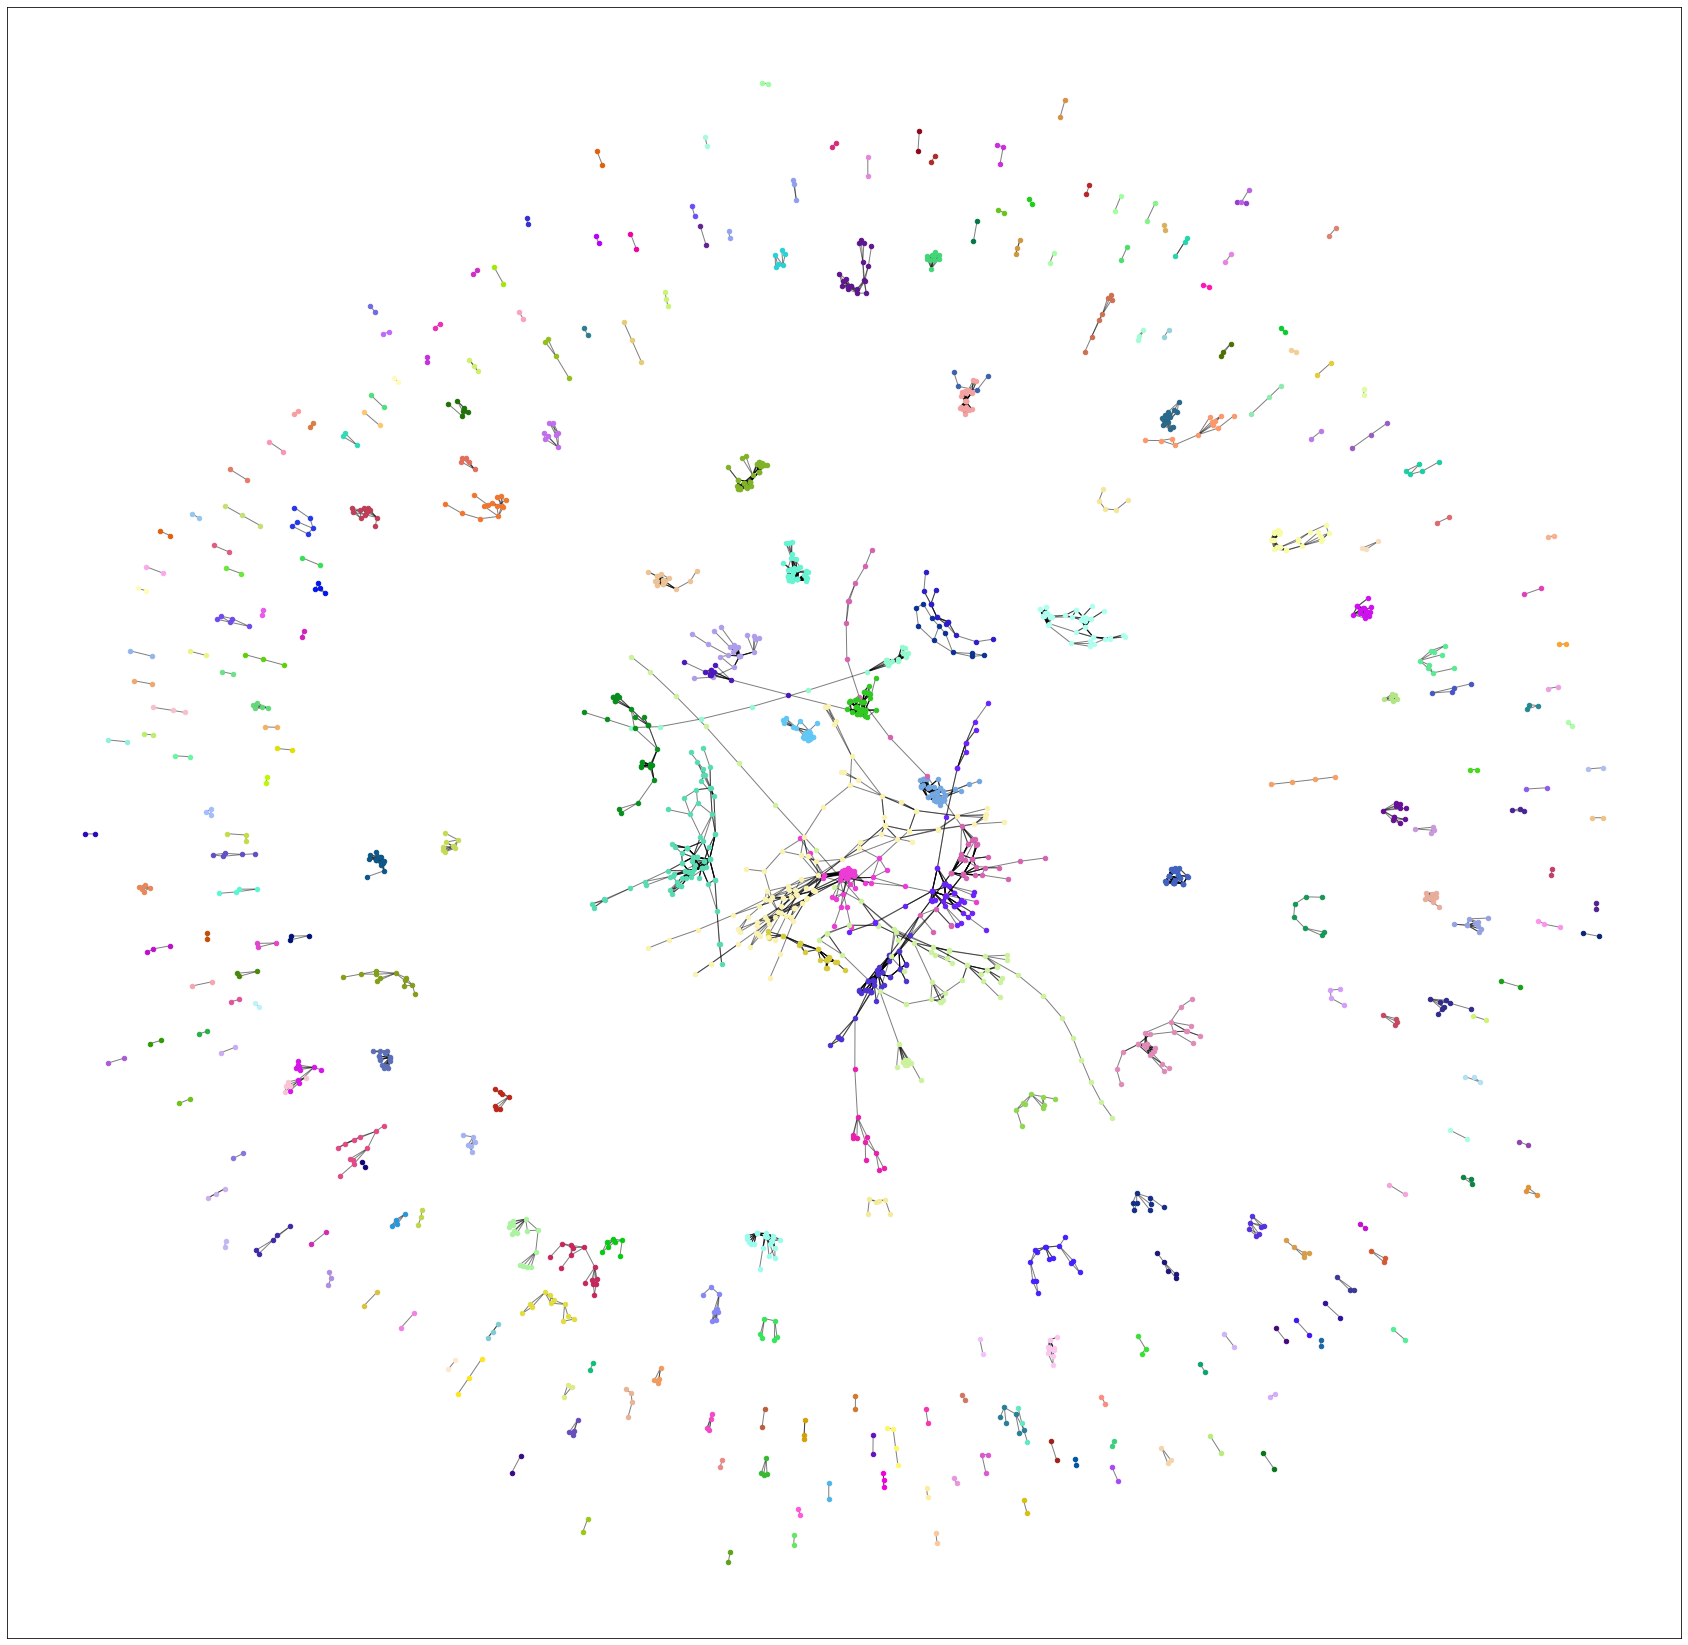

In [123]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()